<a href="https://colab.research.google.com/github/Hyorim-Kim/numpi/blob/main/tfc22naver_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 네이버 제공 영화 리뷰 데이터를 이용해 단어 간 유사도 확인
!pip install konlpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import urllib.request

In [10]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/ratings_train.txt', filename='ratings.txt')
train_data = pd.read_table('ratings.txt')
print(train_data[:5], len(train_data))  # 150000
print(train_data.isnull().values.any())
print(train_data.info())
train_data = train_data.dropna(how='any')
print(len(train_data))  # 149995

train_data['document'] = train_data['document'].str.replace("[^가-힣 ]", "")
print(train_data[:5])

# 불용어(stop words) : 의미가 없는(분석에 영향을 주지 않는) 단어 token
# 영문의 경우에는 nltk에 이미 불용어 사전으로 등록이 되어 있으나 한글은 매우 동적이므로 불용어 사전이 없다.
stopwords = ['의', '가', '은', '는', '잘', '을', '를', '으로', '하여', '에', '와', '한', '하다', '앗', '아', '그래서', '에서', '했던']

okt = Okt()
tokenized_data = []
for sen in train_data['document']:
  temp = okt.morphs(sen, stem=True)
  temp = [word for word in temp if not word in stopwords]
  tokenized_data.append(temp)


         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1 150000
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
None
149995


<ipython-input-10-941614f45467>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^가-힣 ]", "")


         id                                           document  label
0   9976970                                  아 더빙 진짜 짜증나네요 목소리      0
1   3819312                         흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                          교도소 이야기구먼 솔직히 재미는 없다평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...      1


글 최대 길이 :  71
글 평균 길이 :  11.00478682622754


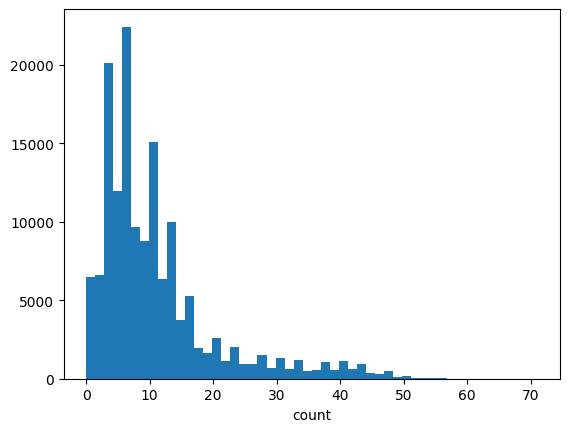

In [12]:
print('글 최대 길이 : ', max(len(i) for i in tokenized_data))
print('글 평균 길이 : ', sum(map(len, tokenized_data)) / len(tokenized_data))

plt.hist([len(i) for i in tokenized_data], bins=50)
plt.xlabel('length')
plt.xlabel('count')
plt.show()

In [14]:
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=10, min_count=3, sg=0)

In [20]:
print(model.wv.vectors.shape)
print(model.wv.most_similar('서스펜스'))

(19231, 100)
[('고풍', 0.8604074716567993), ('쾌감', 0.8567922115325928), ('용두사미', 0.853040874004364), ('중세', 0.8445033431053162), ('추리', 0.8442606329917908), ('미스터리', 0.8375059366226196), ('중요', 0.8356277346611023), ('환타지', 0.8346654772758484), ('결합', 0.8334615230560303), ('어정쩡하다', 0.8317866325378418)]
